# CS381/780 Data Analytics Final Project

### Due on 12/13/2021 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on the follwoing 

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

Attribute Information:

Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical)
Duration in month

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical)
Credit amount

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical)
Installment rate in percentage of disposable income

Attribute 9: (qualitative)
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: (qualitative)
Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
A201 : yes
A202 : no

### Your task in the final project is build the best predictive model to classify if a loan will carry good or bad credit risks. The focus should be in identifying bad risk loans

* Try at least two of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* Answer the question whether past credit history will be an important factor or not.

### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations

In [4]:
df = pd.read_csv("german_credit_modified.csv")
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,2


In [5]:
df['Risk'] = df['Risk'].apply(lambda x: 'good' if x == 1 else 'bad')

In [6]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,bad


<AxesSubplot:xlabel='Risk', ylabel='count'>

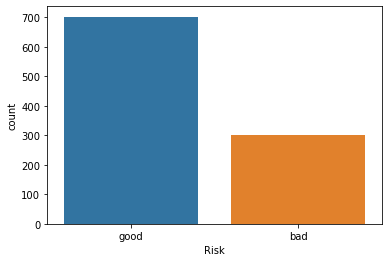

In [7]:
sns.countplot(df['Risk'])

***The original dataset is hard to understand. So we are going to decode the fields to an easier to understand format***

In [8]:
decode_map = {'A11': 'little', 'A12': 'moderate', 'A13': 'rich', 'A14': 'No Account',
              'A30': 'paid back', 'A31': 'paid back', 'A32': 'paid back', 
              'A33': 'delay', 'A34': 'default',
              'A40' : 'car',
              'A41' : 'car',
              'A42' : 'furniture/equipment',
              'A43' : 'radio/television',
              'A44' : 'domestic appliances',
              'A45' : 'repairs',
              'A46' : 'education',
              'A47' : 'vacation',
              'A48' : 'retraining',
              'A49' : 'business',
              'A410' : 'others',
              'A61' :  'little',
              'A62' :  'moderate',
              'A63' :  'quite rich',
              'A64' :  'rich',
              'A65' :  'unknown',
              
              'A71' : 'unemployed',
              'A72' : '< 1 year',
              'A73' : '1 to <4 years',
              'A74': '4 to <7 years',
              'A75' : '>= 7 years',

              'A91' : 'male   : divorced/separated',
              'A92' : 'female : divorced/separated/married',
              'A93' : 'male   : single',
              'A94' : 'male   : married/widowed',
              'A95' : 'female : single',
              
              'A101' : 'none',
              'A102' : 'co-applicant',
              'A103' : 'guarantor',

              'A121' : 'real estate',
              'A122' : 'life insurance',
              'A123' : 'car',
              'A124' : 'no property',
              
              'A141' : 'bank',
              'A142' : 'stores',
              'A143' : 'none',
              'A151' : 'rent',
              'A152' : 'own',
              'A153' : 'for free',


              'A171' : 'unemployed/non-resident',
              'A172' : 'unskilled/resident',
              'A173' : 'skilled employee',
              'A174' : 'management/highly qualified employee',
            
             }

In [9]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: decode_map[x] if x in decode_map.keys() else x)

In [10]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,little,6,default,radio/television,1169,unknown,>= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee,1,good
1,moderate,48,paid back,radio/television,5951,little,1 to <4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee,1,bad
2,No Account,12,default,education,2096,little,4 to <7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled/resident,2,good
3,little,42,paid back,furniture/equipment,7882,little,4 to <7 years,2,male : single,guarantor,4,life insurance,45,none,for free,1,skilled employee,2,good
4,little,24,delay,car,4870,little,1 to <4 years,3,male : single,none,4,no property,53,none,for free,2,skilled employee,2,bad


In [11]:
df.shape

(1003, 19)

***Now you can start from this dataset***

### Good Luck !!!

Show all your work below

#### 1. EDA

In [12]:
# Check if there any null data
df.isnull().any()

Checking Account            False
Duration                    False
Credit History               True
Purpose                     False
Credit Amount               False
Saving Account              False
Employment Status           False
Installment Rate            False
Personal Status             False
Guarantors                  False
Years in current address    False
Property                    False
Age                         False
Installment plans           False
Housing                     False
Existing Credits            False
Job                          True
Liable                      False
Risk                        False
dtype: bool

In [13]:
# Remove missing data rows 
df = df[pd.notnull(df['Credit History'])]
df = df[pd.notnull(df['Job'])]

In [14]:
# Now check it again
df.isnull().any()

Checking Account            False
Duration                    False
Credit History              False
Purpose                     False
Credit Amount               False
Saving Account              False
Employment Status           False
Installment Rate            False
Personal Status             False
Guarantors                  False
Years in current address    False
Property                    False
Age                         False
Installment plans           False
Housing                     False
Existing Credits            False
Job                         False
Liable                      False
Risk                        False
dtype: bool

<AxesSubplot:xlabel='Duration'>

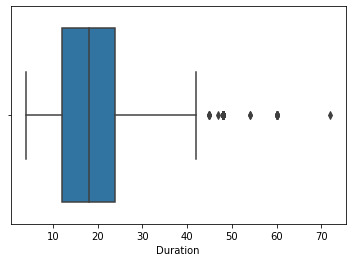

In [15]:
# Check if there are outliers
sns.boxplot(x=df['Duration'])

<AxesSubplot:xlabel='Credit Amount'>

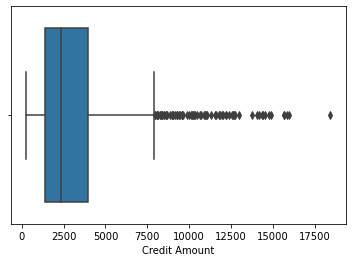

In [16]:
sns.boxplot(x=df['Credit Amount'])

<AxesSubplot:xlabel='Age'>

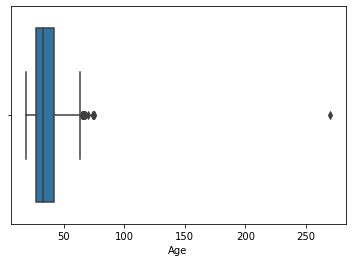

In [17]:
sns.boxplot(x=df['Age'])

In [18]:
# Remove outliers:
df = df[ df['Duration'] < 43]
df = df[ df['Credit Amount'] < 7800]
df = df[ df['Age'] < 100]

#### 2. Basic exploration of relationship

In [19]:
df.groupby('Risk').mean()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable
Risk,,,,,,,
bad,20.017316,2455.913420,3.199134,2.796537,33.393939,1.354978,1.164502
good,17.263889,2522.341049,2.952160,2.854938,36.270062,1.427469,1.145062


<AxesSubplot:xlabel='Risk', ylabel='Duration'>

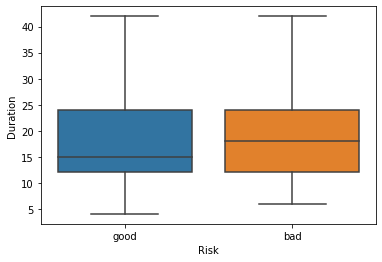

In [20]:
sns.boxplot(x='Risk', y = 'Duration', data=df)

<AxesSubplot:xlabel='Risk', ylabel='Credit Amount'>

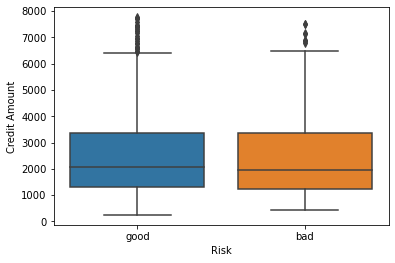

In [21]:
sns.boxplot(x='Risk', y = 'Credit Amount', data=df)

<AxesSubplot:xlabel='Risk', ylabel='Age'>

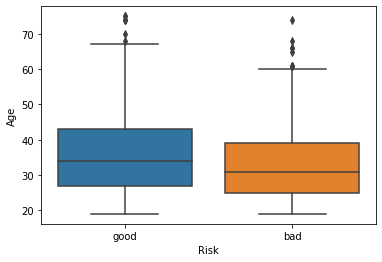

In [22]:
sns.boxplot(x='Risk', y = 'Age', data=df)

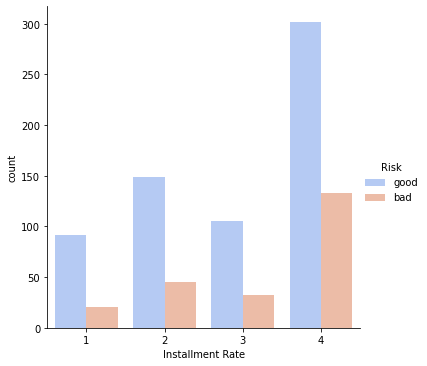

In [23]:
sns.factorplot(x='Installment Rate', kind='count', hue='Risk', data=df, palette='coolwarm')

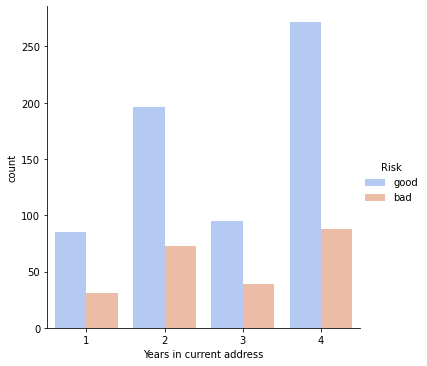

In [24]:
sns.factorplot(x='Years in current address', kind='count', hue='Risk', data=df,palette='coolwarm')

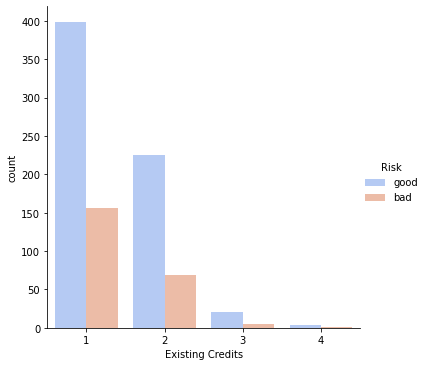

In [25]:
sns.factorplot(x='Existing Credits', kind='count', hue='Risk', data=df,palette='coolwarm')

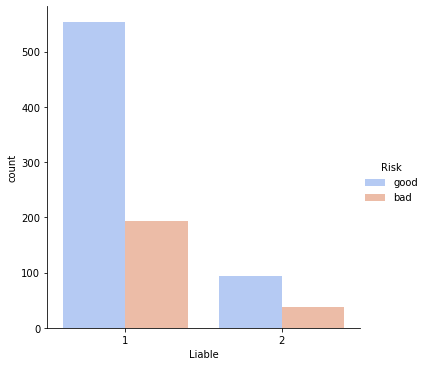

In [26]:
sns.factorplot(x='Liable', kind='count', hue='Risk', data=df,palette='coolwarm')

<AxesSubplot:xlabel='Risk', ylabel='count'>

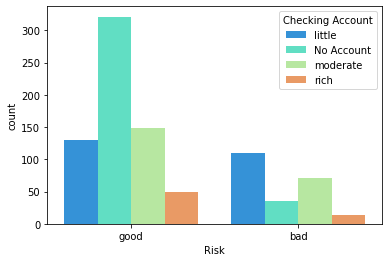

In [27]:
sns.countplot(x='Risk',hue='Checking Account',data=df,palette='rainbow')

<AxesSubplot:xlabel='Risk', ylabel='count'>

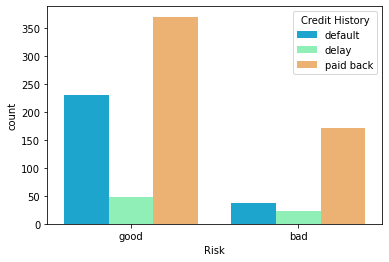

In [28]:
sns.countplot(x='Risk',hue='Credit History',data=df,palette='rainbow')

<AxesSubplot:xlabel='Risk', ylabel='count'>

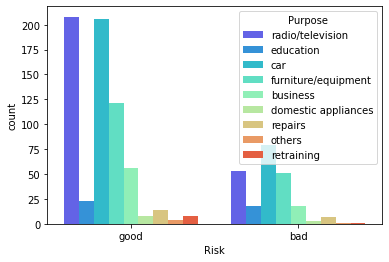

In [29]:
sns.countplot(x='Risk',hue='Purpose',data=df,palette='rainbow')

<AxesSubplot:xlabel='Risk', ylabel='count'>

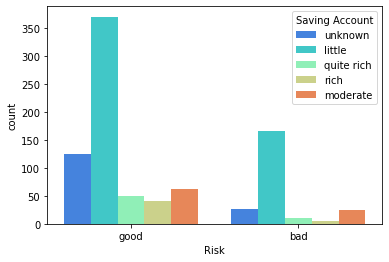

In [30]:
sns.countplot(x='Risk',hue='Saving Account',data=df,palette='rainbow')

<AxesSubplot:xlabel='Risk', ylabel='count'>

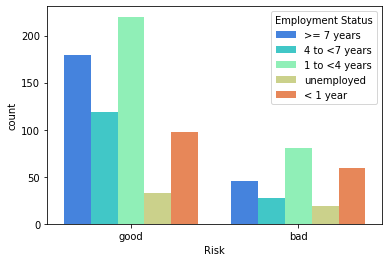

In [31]:
sns.countplot(x='Risk',hue='Employment Status',data=df,palette='rainbow')

<AxesSubplot:xlabel='Risk', ylabel='count'>

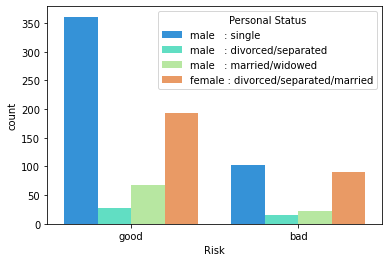

In [32]:
sns.countplot(x='Risk',hue='Personal Status',data=df,palette='rainbow')

<AxesSubplot:xlabel='Risk', ylabel='count'>

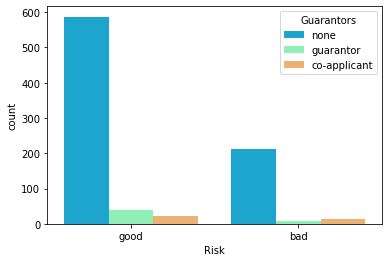

In [33]:
sns.countplot(x='Risk',hue='Guarantors',data=df,palette='rainbow')

<AxesSubplot:xlabel='Risk', ylabel='count'>

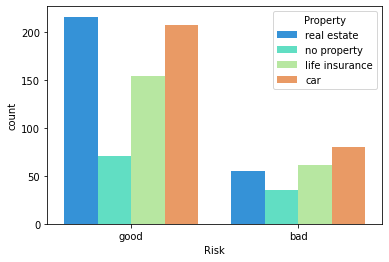

In [34]:
sns.countplot(x='Risk',hue='Property',data=df,palette='rainbow')

<AxesSubplot:xlabel='Risk', ylabel='count'>

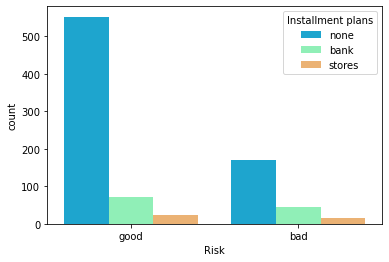

In [35]:
sns.countplot(x='Risk',hue='Installment plans',data=df,palette='rainbow')

<AxesSubplot:xlabel='Risk', ylabel='count'>

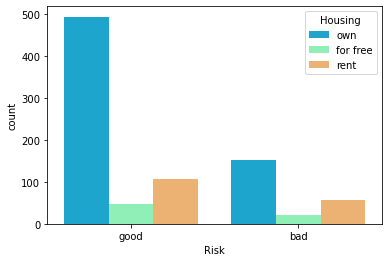

In [36]:
sns.countplot(x='Risk',hue='Housing',data=df,palette='rainbow')

<AxesSubplot:xlabel='Risk', ylabel='count'>

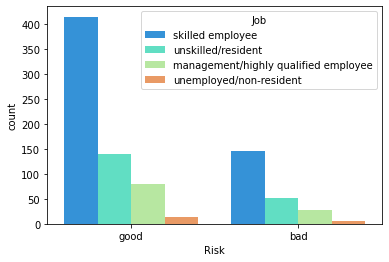

In [37]:
sns.countplot(x='Risk',hue='Job',data=df,palette='rainbow')

#### 3. Set numerical variables

In [38]:
# Based on the result of relationships above, I choose "Duration", "Credit Amount" and "Age" for the numerical_features
numerical_features = ['Duration', 'Credit Amount', 'Age']
# Collect all numerical features with the target variable
numerical_df = df[numerical_features + ['Risk']]
train_df = numerical_df
train_df.head()

,Duration,Credit Amount,Age,Risk
0,6,1169,67,good
2,12,2096,49,good
4,24,4870,53,bad
6,24,2835,53,good
7,36,6948,35,good


#### 4. Setup dummy variables for categorical variables (without "Credit History"）

In [39]:
# Here I choose "Checking Account", "Personal Status" and "Property" to create their dummy variables
Checking_Account = pd.get_dummies(df['Checking Account'],drop_first=True)
Checking_Account

,little,moderate,rich
0,1,0,0
2,0,0,0
4,1,0,0
6,0,0,0
7,0,1,0
...,...,...,...
995,1,0,0
996,0,0,0
997,0,0,0
998,1,0,0


In [40]:
Personal_Status = pd.get_dummies(df['Personal Status'],drop_first=True)
Personal_Status

,male : divorced/separated,male : married/widowed,male : single
0,0,0,1
2,0,0,1
4,0,0,1
6,0,0,1
7,0,0,1
...,...,...,...
995,0,0,1
996,0,0,1
997,0,0,0
998,1,0,0


In [41]:
Property = pd.get_dummies(df['Property'],drop_first=True)
Property

,life insurance,no property,real estate
0,0,0,1
2,0,0,1
4,0,1,0
6,1,0,0
7,0,0,0
...,...,...,...
995,1,0,0
996,0,0,0
997,0,0,1
998,1,0,0


In [42]:
# Merge them into data set
train_df = pd.concat([train_df, Checking_Account, Personal_Status, Property], axis=1)
train_df.head()

,Duration,Credit Amount,Age,Risk,little,moderate,rich,male : divorced/separated,male : married/widowed,male : single,life insurance,no property,real estate
0,6,1169,67,good,1,0,0,0,0,1,0,0,1
2,12,2096,49,good,0,0,0,0,0,1,0,0,1
4,24,4870,53,bad,1,0,0,0,0,1,0,1,0
6,24,2835,53,good,0,0,0,0,0,1,1,0,0
7,36,6948,35,good,0,1,0,0,0,1,0,0,0


#### 5. separated data set into training and testing

In [43]:
X = train_df.drop('Risk', axis=1)
Y = train_df['Risk']

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(0.8 * train_df.shape[0])
print(0.2 * train_df.shape[0])

(703, 12)
(176, 12)
(703,)
(176,)
703.2
175.8


#### 6. Build models

In [46]:
# First, Build a Logistic Regression model
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
predictions = model1.predict(X_test)

In [47]:
print("Logistic Regression model:")
print(classification_report(Y_test,predictions))
print("Accuracy: ", accuracy_score(Y_test, predictions))

Logistic Regression model:
              precision    recall  f1-score   support

         bad       0.48      0.33      0.39        36
        good       0.84      0.91      0.87       140

    accuracy                           0.79       176
   macro avg       0.66      0.62      0.63       176
weighted avg       0.77      0.79      0.77       176

Accuracy:  0.7897727272727273


In [48]:
# Second, Build a Build a Decision Tree Classifier model
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)
predictions = model2.predict(X_test)

In [49]:
print("Decision Tree Classifier model:")
print(classification_report(Y_test,predictions))
print("Accuracy: ", accuracy_score(Y_test, predictions))

Decision Tree Classifier model:
              precision    recall  f1-score   support

         bad       0.33      0.44      0.38        36
        good       0.84      0.76      0.80       140

    accuracy                           0.70       176
   macro avg       0.58      0.60      0.59       176
weighted avg       0.74      0.70      0.71       176

Accuracy:  0.6988636363636364


In [50]:
# Third, Build a Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
predictions = model3.predict(X_test)

In [51]:
print("Naive Bayes model:")
print(classification_report(Y_test,predictions))
print("Accuracy: ", accuracy_score(Y_test, predictions))

Naive Bayes model:
              precision    recall  f1-score   support

         bad       0.33      0.31      0.32        36
        good       0.83      0.84      0.83       140

    accuracy                           0.73       176
   macro avg       0.58      0.57      0.58       176
weighted avg       0.72      0.73      0.73       176

Accuracy:  0.7329545454545454


#### 7.  Performed Cross Validation

In [52]:
# Do the 10 fold cross validations
# For the Logistic Regression
import random
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model1 = LogisticRegression()
    model1.fit(X_train, Y_train)
    Y_pred = model1.predict(X_test)
    acc = accuracy_score(Y_pred , Y_test)
    accuracy.append(acc)

rdf = pd.DataFrame( {'Trial': range(10), 'Accuracy Score': accuracy})
rdf

,Trial,Accuracy Score
0,0,0.778409
1,1,0.778409
2,2,0.727273
3,3,0.761364
4,4,0.744318
5,5,0.767045
6,6,0.772727
7,7,0.732955
8,8,0.670455
9,9,0.761364


<AxesSubplot:xlabel='Trial'>

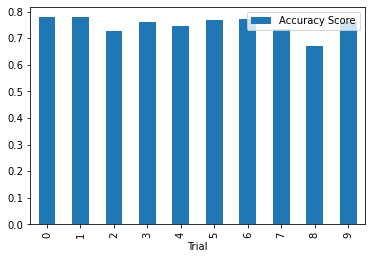

In [53]:
rdf.plot.bar(x='Trial', y='Accuracy Score')

In [54]:
# For the Decision Tree Classifier
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model2 = DecisionTreeClassifier()
    model2.fit(X_train, Y_train)
    Y_pred = model2.predict(X_test)
    acc = accuracy_score(Y_pred , Y_test)
    accuracy.append(acc)

rdf = pd.DataFrame( {'Trial': range(10), 'Accuracy Score': accuracy})
rdf

,Trial,Accuracy Score
0,0,0.681818
1,1,0.664773
2,2,0.710227
3,3,0.670455
4,4,0.693182
5,5,0.687500
6,6,0.676136
7,7,0.732955
8,8,0.681818
9,9,0.698864


<AxesSubplot:xlabel='Trial'>

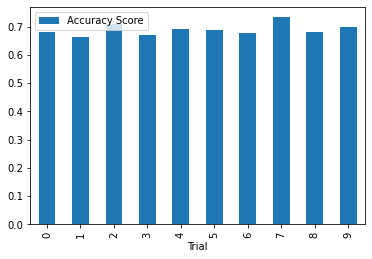

In [55]:
rdf.plot.bar(x='Trial', y='Accuracy Score')

In [56]:
# For the Naive Bayes
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model3 = GaussianNB()
    model3.fit(X_train, Y_train)
    Y_pred = model3.predict(X_test)
    acc = accuracy_score(Y_pred , Y_test)
    accuracy.append(acc)

rdf = pd.DataFrame( {'Trial': range(10), 'Accuracy Score': accuracy})
rdf

,Trial,Accuracy Score
0,0,0.721591
1,1,0.704545
2,2,0.693182
3,3,0.670455
4,4,0.704545
5,5,0.704545
6,6,0.721591
7,7,0.715909
8,8,0.789773
9,9,0.676136


<AxesSubplot:xlabel='Trial'>

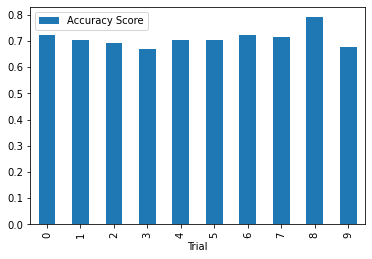

In [57]:
rdf.plot.bar(x='Trial', y='Accuracy Score')

##### All of them pass cross-validation becasue Accuracy Score does not vary much.
##### As a result, the best model is the Logistic Regression model

#### 6. “Credit History” variable

In [58]:
# Try using "Credit History" to figure out whether “Credit History” is important
# Here I use the Logistic Regression model for comparing
Credit_History = pd.get_dummies(df['Credit History'],drop_first=True)
Credit_History

,delay,paid back
0,0,0
2,0,0
4,1,0
6,0,1
7,0,1
...,...,...
995,0,1
996,0,1
997,0,1
998,0,1


In [59]:
train_df = pd.concat([train_df, Credit_History], axis=1)
train_df.head()

,Duration,Credit Amount,Age,Risk,little,moderate,rich,male : divorced/separated,male : married/widowed,male : single,life insurance,no property,real estate,delay,paid back
0,6,1169,67,good,1,0,0,0,0,1,0,0,1,0,0
2,12,2096,49,good,0,0,0,0,0,1,0,0,1,0,0
4,24,4870,53,bad,1,0,0,0,0,1,0,1,0,1,0
6,24,2835,53,good,0,0,0,0,0,1,1,0,0,0,1
7,36,6948,35,good,0,1,0,0,0,1,0,0,0,0,1


In [60]:
X = train_df.drop('Risk',axis=1)
Y = train_df['Risk']

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [62]:
model4 = LogisticRegression()
model4.fit(X_train,Y_train)
predictions = model4.predict(X_test)

In [63]:
print("Logistic Regression model With 'Credit History': ")
print(classification_report(Y_test,predictions))
print("Accuracy: ", accuracy_score(Y_test, predictions))

Logistic Regression model With 'Credit History': 
              precision    recall  f1-score   support

         bad       0.48      0.33      0.39        36
        good       0.84      0.91      0.87       140

    accuracy                           0.79       176
   macro avg       0.66      0.62      0.63       176
weighted avg       0.77      0.79      0.77       176

Accuracy:  0.7897727272727273


##### Compared with the model which is not having "Credit History", the performance where the precision, recall and f1-score of bad loan are all same, so "Credit History" is actually not important.